In [ ]:
!pip install node2vec

  Using cached networkx-2.8.8-py3-none-any.whl (2.0 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import networkx as nx
from node2vec import Node2Vec
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import pandas as pd
import networkx as nx
from node2vec import Node2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('/content/Payments.csv')

# Construct the graph from the data
G = nx.from_pandas_edgelist(df, source='Sender', target='Receiver', edge_attr='Amount', create_using=nx.DiGraph())



In [196]:
df.describe()

,Sender,Receiver,Amount
count,130535.000000,130535.000000,1.305350e+05
mean,158.238733,138.998981,6.980968e+04
std,156.651996,109.473202,5.696676e+04
min,0.000000,0.000000,1.501000e+03
25%,39.000000,45.000000,2.411100e+04
50%,107.000000,113.000000,5.622000e+04
75%,221.000000,226.000000,1.079405e+05
max,702.000000,370.000000,2.124500e+06


In [ ]:
# Construct the graph from the data
G = nx.from_pandas_edgelist(df, source='Sender', target='Receiver', edge_attr='Amount', create_using=nx.DiGraph())

# Apply Node2Vec algorithm
# Adjust parameters as needed: dimensions, walks per node, walk length, context size, return p, in-out q
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=100, workers=4, p=1, q=1)
model = node2vec.fit(window=10, min_count=1)



Computing transition probabilities:   0%|          | 0/799 [00:00<?, ?it/s]

In [ ]:
# Extract node embeddings
node_embeddings = np.array([model.wv.get_vector(str(node)) for node in G.nodes()])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

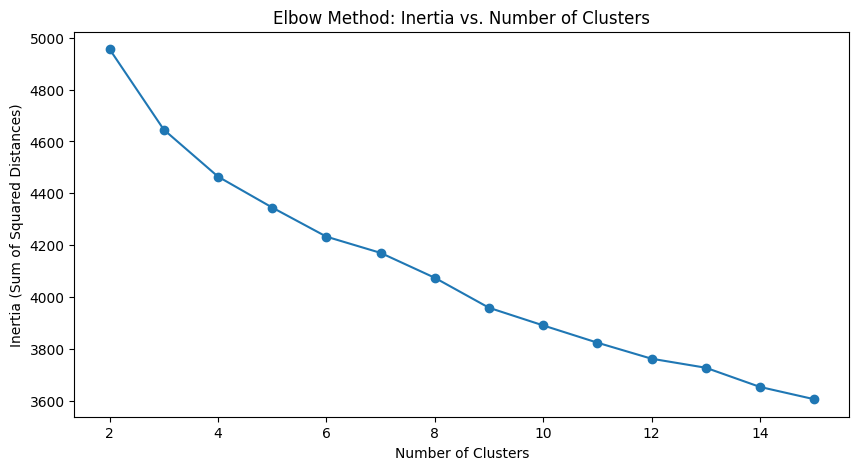

In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



max_clusters = 15  # Adjust as needed
inertia = []

# Loop through different numbers of clusters
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(node_embeddings)

    # Calculate the sum of squared distances (inertia)
    inertia.append(kmeans.inertia_)

# Plot the Elbow plot
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method: Inertia vs. Number of Clusters')
plt.show()

# Based on the plots, you can choose the optimal number of clusters
# - Elbow Method: Choose the number of clusters where the inertia curve flattens out (the "elbow" point)
# - Silhouette Score: Choose the number of clusters with the highest silhouette score


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: [1032, 1008, 1053, 1028, 1323, 1059, 1268, 1052, 1118, 1175, 1296, 1187, 1157, 1070, 1230, 1311, 1094, 1122, 1182, 1029, 1036, 1156, 1213, 1241, 1062, 1180, 1231, 1173, 1041, 1055, 1294, 1190, 1219, 1266, 1315, 1107, 1109, 1212, 1125, 1171, 1178, 1208, 1263, 1400, 1436, 1458, 1508, 1238, 1513, 1546, 1127, 1131, 1153, 1161, 1331, 1367, 1374, 1380, 1430, 1493, 1373, 1438, 1316, 1348, 1489, 1428, 1550, 1565, 1521, 1270, 1359, 1117, 1411, 1417, 1465, 1540, 1569, 1188, 1206, 1234, 1237, 1253, 1785, 1830, 1836, 1288, 1320, 1352]
Cluster 1: [1147, 1099, 1801, 1017, 1075, 2088, 1350, 1276, 1658, 1138, 1089, 1623, 1051, 1747, 1135, 1500, 1136, 1809, 1774, 1037, 1930, 2184, 1690, 1679, 1049, 1105, 1013, 1541, 1084, 1480, 1405, 1016, 2073, 1015, 1535, 1077, 1431, 1080, 1098, 1009, 1191, 1146, 1199, 1754, 1134, 1202, 1120, 1528, 1678, 1447, 1035, 1326, 1181, 1246, 1406, 1046, 1126, 1645, 2071, 1769, 1073, 1471, 1562, 1419, 1223, 1283, 1103, 1524, 1764, 1397, 2000, 2142, 1818, 1624, 1072

<ipython-input-147-39bee839ba39>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))
<ipython-input-147-39bee839ba39>:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(node_embeddings_tsne[cluster_indices, 0], node_embeddings_tsne[cluster_indices, 1], c=colors(label), label=f'Cluster {label}')


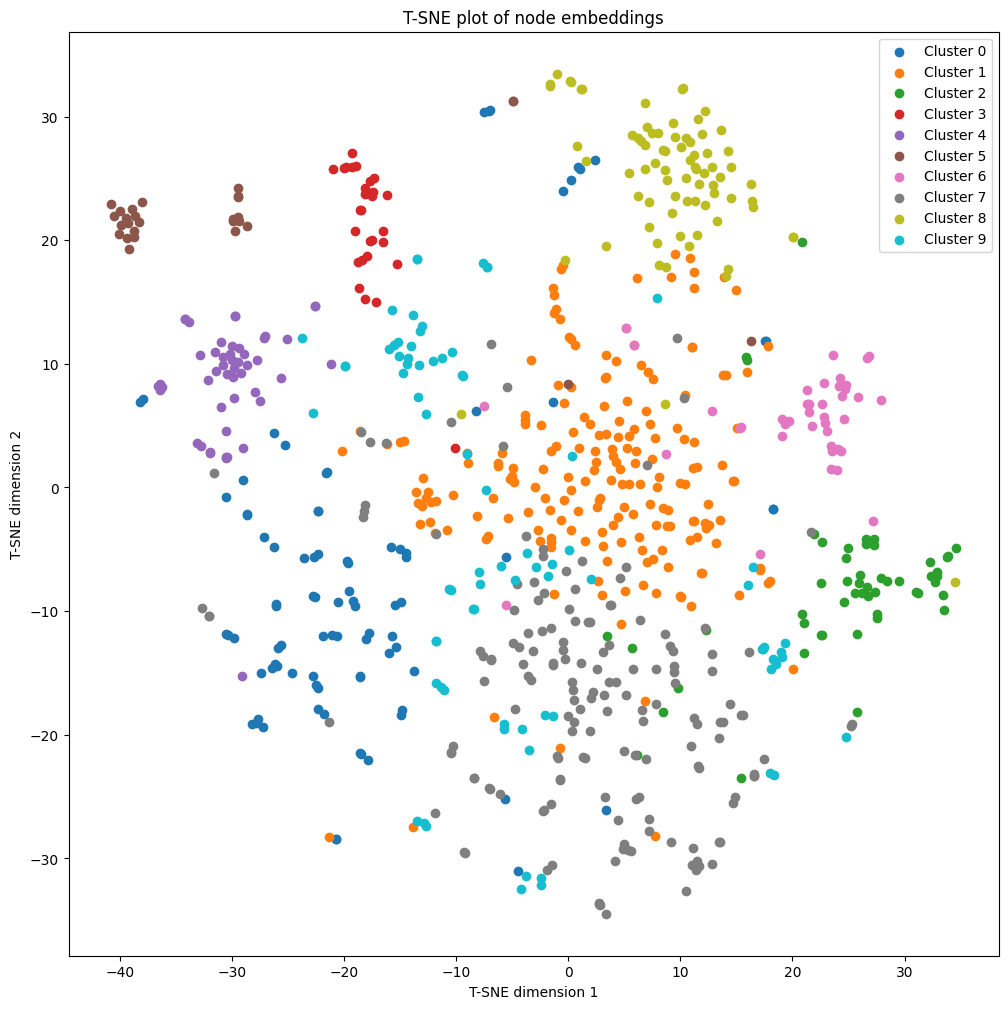

In [ ]:


# Apply clustering algorithm (e.g., KMeans or DBSCAN)
# KMeans
n_clusters = 10 # Adjust as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(node_embeddings)

# Alternatively, you can use DBSCAN
# eps = 0.5  # Adjust as needed
# min_samples = 5  # Adjust as needed
# dbscan = DBSCAN(eps=eps, min_samples=min_samples)
# labels = dbscan.fit_predict(node_embeddings)

# Create a dictionary to hold cluster information
clusters = {}
for node, label in zip(G.nodes(), labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(node)

# Print nodes in each cluster
for label in sorted(clusters):
    print(f"Cluster {label}: {clusters[label]}")

# Visualize the clusters using T-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
node_embeddings_tsne = tsne.fit_transform(node_embeddings)

# Plot the T-SNE plot with clustering labels
plt.figure(figsize=(12, 12))
unique_labels = set(labels)
colors = plt.cm.get_cmap('tab10', len(unique_labels))

# Plot each cluster
for label in unique_labels:
    if label == -1:
        # Noise points (if using DBSCAN)
        continue
    cluster_indices = np.where(labels == label)[0]
    plt.scatter(node_embeddings_tsne[cluster_indices, 0], node_embeddings_tsne[cluster_indices, 1], c=colors(label), label=f'Cluster {label}')

plt.title('T-SNE plot of node embeddings')
plt.xlabel('T-SNE dimension 1')
plt.ylabel('T-SNE dimension 2')
plt.legend()
plt.show()


In [ ]:
min_samples = 2

min_samples

2

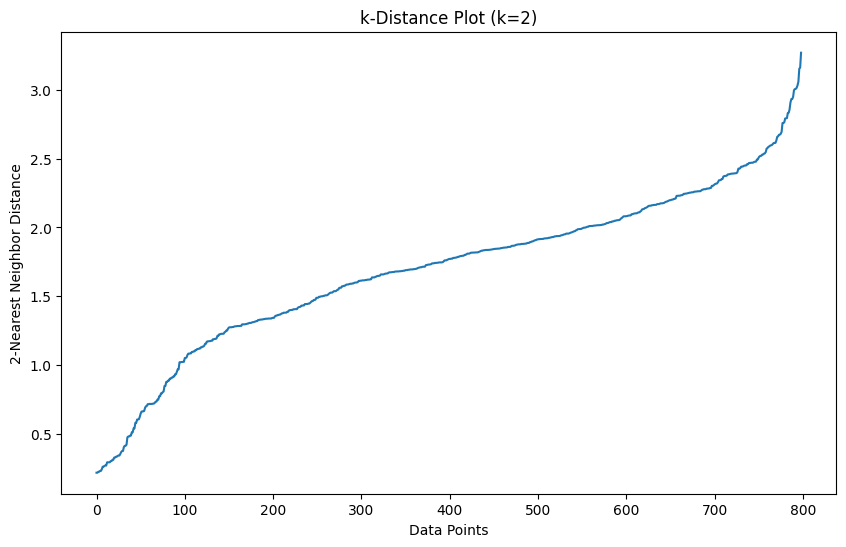

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Number of nearest neighbors to consider
k = 2  # Adjust as needed

# Find the k-nearest neighbors for each data point
nearest_neighbors = NearestNeighbors(n_neighbors=k)
nearest_neighbors.fit(node_embeddings)
distances, indices = nearest_neighbors.kneighbors(node_embeddings)

# Sort distances (4th nearest neighbor distance) for each point
distances = np.sort(distances[:, k-1])

# Plot the k-distance plot
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel(f'Data Points')
plt.ylabel(f'{k}-Nearest Neighbor Distance')
plt.title(f'k-Distance Plot (k={k})')
plt.show()

In [ ]:
eps = 2  # Replace with the value found from the plot

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(node_embeddings)

Noise: [1011, 1568, 1147, 1393, 1944, 1061, 1327, 1089, 1002, 1004, 1595, 1839, 1500, 1136, 1172, 1293, 1990, 1310, 1159, 1013, 1541, 1189, 1080, 1098, 1009, 1191, 1142, 1389, 1068, 1633, 1120, 1447, 1326, 1040, 1060, 1353, 1287, 1128, 1529, 2031, 1236, 1617, 1261, 1302, 1339, 1959, 2071, 1054, 1473, 1391, 1859, 1764, 1179, 1818, 1072, 1328, 1519, 1217, 1166, 2017, 1008, 1793, 1110, 1377, 2158, 1306, 1053, 1278, 1338, 1443, 2097, 1286, 1113, 2039, 1112, 1995, 1026, 1858, 1387, 2076, 1358, 2066, 1028, 1388, 1323, 1351, 1262, 1247, 2084, 1274, 1152, 2053, 1638, 1579, 2188, 1059, 1432, 1551, 1772, 1052, 2008, 1845, 1749, 2061, 1580, 1118, 1759, 1347, 1187, 1157, 1573, 1544, 1070, 1230, 1311, 1285, 1871, 1182, 1027, 1255, 1029, 1036, 1531, 1827, 1375, 1846, 1602, 1156, 1213, 2047, 1241, 1062, 1916, 2136, 1877, 1671, 2024, 1300, 1292, 1518, 1180, 1235, 1231, 1634, 1669, 2052, 1975, 1055, 1758, 1520, 1778, 1482, 1427, 1960, 1966, 1190, 1219, 1266, 1460, 1315, 1978, 1107, 1109, 1765, 1212, 18

<ipython-input-151-43c63d5d016c>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels) - 1)
<ipython-input-151-43c63d5d016c>:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(node_embeddings_tsne[labels == label, 0], node_embeddings_tsne[labels == label, 1], c=colors(label), label=f'Cluster {label}')


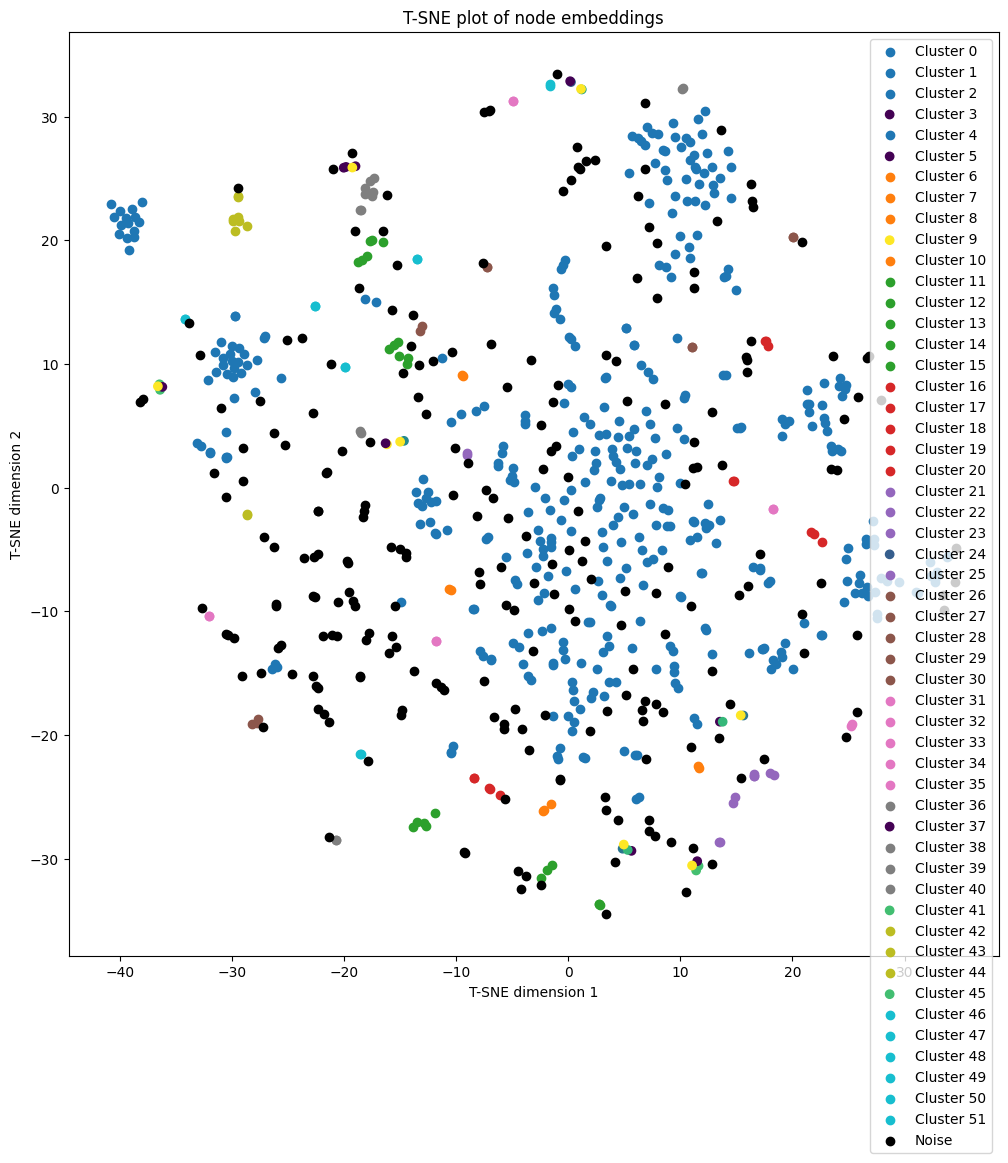

In [ ]:
# Create a dictionary to hold cluster information
clusters = {}
for node, label in zip(G.nodes(), labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(node)

# Print nodes in each cluster
for label in sorted(clusters):
    if label == -1:
        print(f"Noise: {clusters[label]}")
    else:
        print(f"Cluster {label}: {clusters[label]}")

# Visualize the clusters using T-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
node_embeddings_tsne = tsne.fit_transform(node_embeddings)

# Plot the T-SNE plot with clustering labels
plt.figure(figsize=(12, 12))
unique_labels = set(labels)

# Define colors to use for each cluster and for noise points
colors = plt.cm.get_cmap('tab10', len(unique_labels) - 1)

# Plot each cluster
for label in unique_labels:
    if label == -1:
        # Plot noise points with a different color
        plt.scatter(node_embeddings_tsne[labels == label, 0], node_embeddings_tsne[labels == label, 1], c='black', label='Noise')
    else:
        # Plot clusters with different colors
        plt.scatter(node_embeddings_tsne[labels == label, 0], node_embeddings_tsne[labels == label, 1], c=colors(label), label=f'Cluster {label}')

plt.title('T-SNE plot of node embeddings')
plt.xlabel('T-SNE dimension 1')
plt.ylabel('T-SNE dimension 2')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import networkx as nx
from sklearn.cluster import KMeans




In [ ]:
import pandas as pd
import networkx as nx
from sklearn.manifold import SpectralEmbedding, TSNE
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('Payments.csv')

# Construct the graph from the data
#G = nx.from_pandas_edgelist(df, source='Sender', target='Receiver', edge_attr='Amount', create_using=nx.DiGraph())


In [ ]:
G = nx.DiGraph()
for _, row in df.iterrows():
    if G.has_edge(row['Sender'], row['Receiver']):
        G[row['Sender']][row['Receiver']]['weight'] += row['Amount']
    else:
        G.add_edge(row['Sender'], row['Receiver'], weight=row['Amount'])

In [ ]:
undirected = G.to_undirected()



for u in undirected.nodes():
    e_u = list(undirected[u])
    for v in e_u:
        for w in undirected[v]:
            if u != v and v != w and w != u and u in undirected[w]:
                w_uv = G[u][v]['weight'] if G.has_edge(u, v) else 0
                w_vu = G[v][u]['weight'] if G.has_edge(v, u) else 0
                w_vw = G[v][w]['weight'] if G.has_edge(v, w) else 0
                w_wv = G[w][v]['weight'] if G.has_edge(w, v) else 0
                w_wu = G[w][u]['weight'] if G.has_edge(w, u) else 0
                w_uw = G[u][w]['weight'] if G.has_edge(u, w) else 0

                new_weight = 1 + np.exp(-max(
                    abs(w_uv - w_vu),
                    abs(w_vw - w_wv),
                    abs(w_wu - w_uw)
                ))

                undirected[u][v]['weight'] = new_weight
                undirected[v][w]['weight'] = new_weight
                undirected[w][u]['weight'] = new_weight

In [ ]:
laplacian = nx.laplacian_matrix(undirected)


# Compute the eigenvalues and eigenvectors of the Laplacian
eigenvalues, eigenvectors = np.linalg.eigh(laplacian.A)

# Sort eigenvalues and corresponding eigenvectors
idx = eigenvalues.argsort()
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
# print(eigenvectors.shape)

dim = 64
embedding = eigenvectors[:, 0:dim ]
# print(embedding.shape)
embedding = embedding / np.linalg.norm(embedding, axis=1, keepdims=True)



<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  import inspect


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

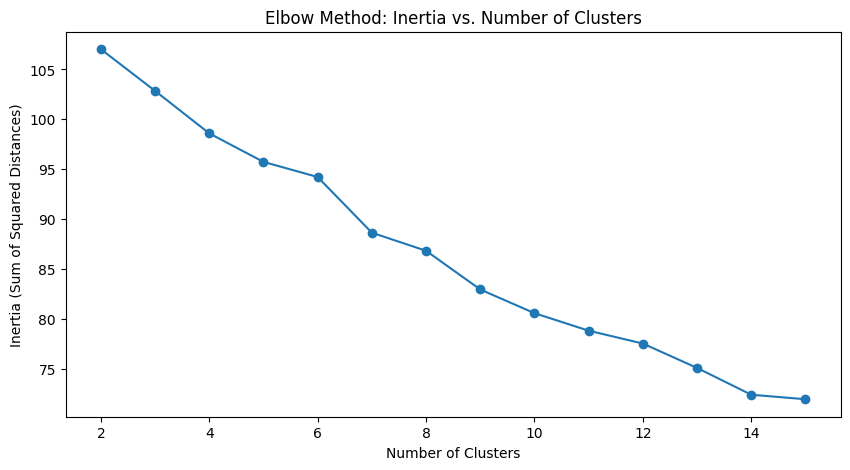

In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



max_clusters = 15  # Adjust as needed
inertia = []

# Loop through different numbers of clusters
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(embedding)

    # Calculate the sum of squared distances (inertia)
    inertia.append(kmeans.inertia_)

# Plot the Elbow plot
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method: Inertia vs. Number of Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: [1309, 1011, 1259, 1147, 1393, 1039, 1256, 1074, 1668, 1007, 1034, 1099, 1488, 1076, 1944, 1659, 1205, 1220, 1032, 1837, 1061, 1222, 1017, 1075, 1023, 2085, 2088, 1350, 1327, 1276, 1666, 1056, 1748, 1658, 1003, 1228, 1138, 1089, 1002, 1623, 1264, 1875, 1004, 1595, 1090, 1051, 1101, 1079, 1104, 1839, 1747, 1135, 1656, 1148, 1136, 1172, 1132, 1774, 1037, 1930, 2184, 1243, 1293, 1690, 1449, 1310, 1679, 1159, 1335, 1862, 1049, 1105, 1766, 1013, 1541, 1961, 1575, 1189, 1723, 1962, 1084, 2146, 1405, 1016, 1729, 2166, 1344, 1917, 1535, 1077, 1087, 1431, 1080, 1098, 1701, 1191, 1142, 1081, 1146, 1199, 1754, 1545, 1134, 1517, 1202, 1389, 1014, 1356, 1068, 1633, 1108, 1120, 1528, 1678, 1447, 1326, 1181, 1246, 1406, 1168, 1046, 1019, 1058, 1040, 1060, 1078, 1581, 1353, 1287, 1128, 1149, 1209, 1813, 1529, 2031, 1617, 1215, 1470, 1065, 1126, 1835, 1582, 2034, 1390, 1598, 1645, 1261, 1939, 1597, 1302, 1339, 1780, 1114, 1891, 1959, 2071, 1475, 1769, 1073, 1471, 1562, 1419, 1162, 1054, 1224

<ipython-input-164-504707319002>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))
<ipython-input-164-504707319002>:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(node_embeddings_tsne[cluster_indices, 0], node_embeddings_tsne[cluster_indices, 1], c=colors(label), label=f'Cluster {label}')


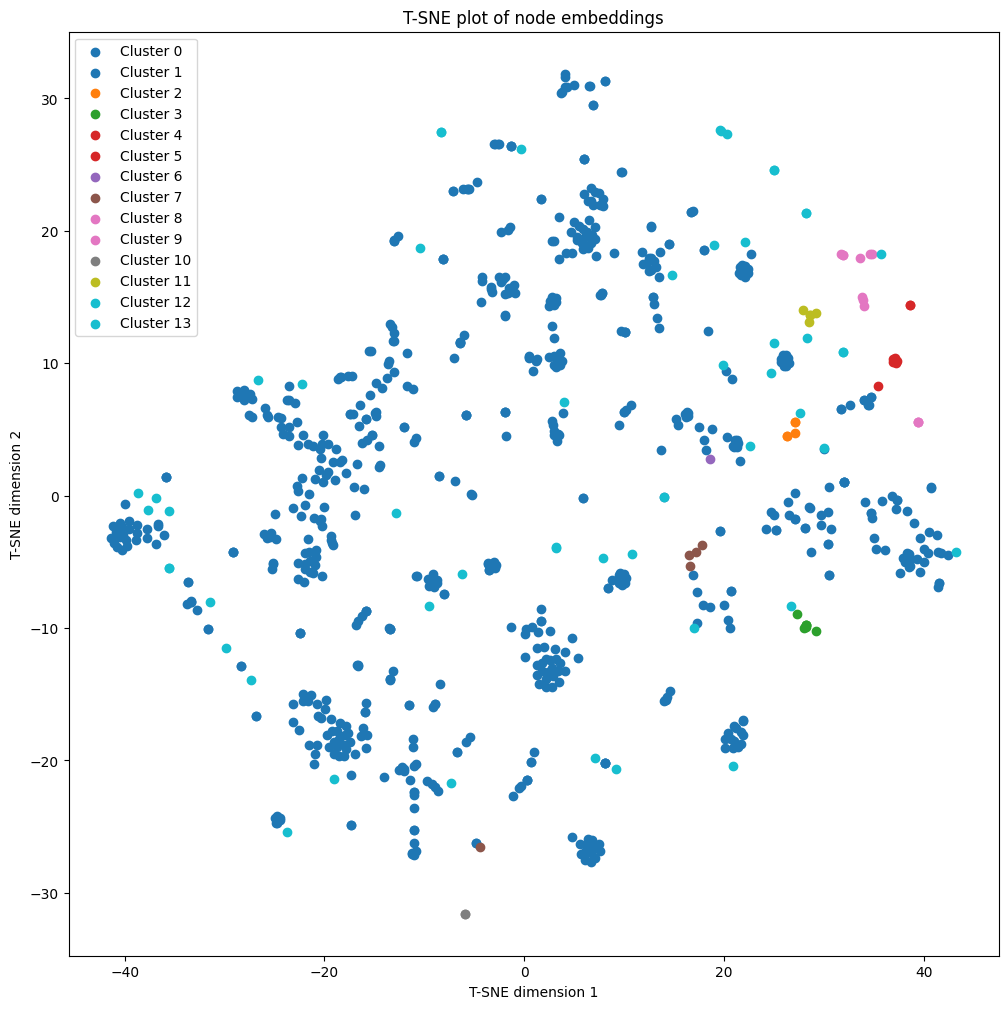

In [ ]:


# Apply clustering algorithm (e.g., KMeans or DBSCAN)
# KMeans
n_clusters = 14 # Adjust as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(embedding)

# Alternatively, you can use DBSCAN
# eps = 0.5  # Adjust as needed
# min_samples = 5  # Adjust as needed
# dbscan = DBSCAN(eps=eps, min_samples=min_samples)
# labels = dbscan.fit_predict(node_embeddings)

# Create a dictionary to hold cluster information
clusters = {}
for node, label in zip(G.nodes(), labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(node)

# Print nodes in each cluster
for label in sorted(clusters):
    print(f"Cluster {label}: {clusters[label]}")

# Visualize the clusters using T-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
node_embeddings_tsne = tsne.fit_transform(embedding)

# Plot the T-SNE plot with clustering labels
plt.figure(figsize=(12, 12))
unique_labels = set(labels)
colors = plt.cm.get_cmap('tab10', len(unique_labels))

# Plot each cluster
for label in unique_labels:
    if label == -1:
        # Noise points (if using DBSCAN)
        continue
    cluster_indices = np.where(labels == label)[0]
    plt.scatter(node_embeddings_tsne[cluster_indices, 0], node_embeddings_tsne[cluster_indices, 1], c=colors(label), label=f'Cluster {label}')

plt.title('T-SNE plot of node embeddings')
plt.xlabel('T-SNE dimension 1')
plt.ylabel('T-SNE dimension 2')
plt.legend()
plt.show()

In [ ]:
min_samples = 2

min_samples

2

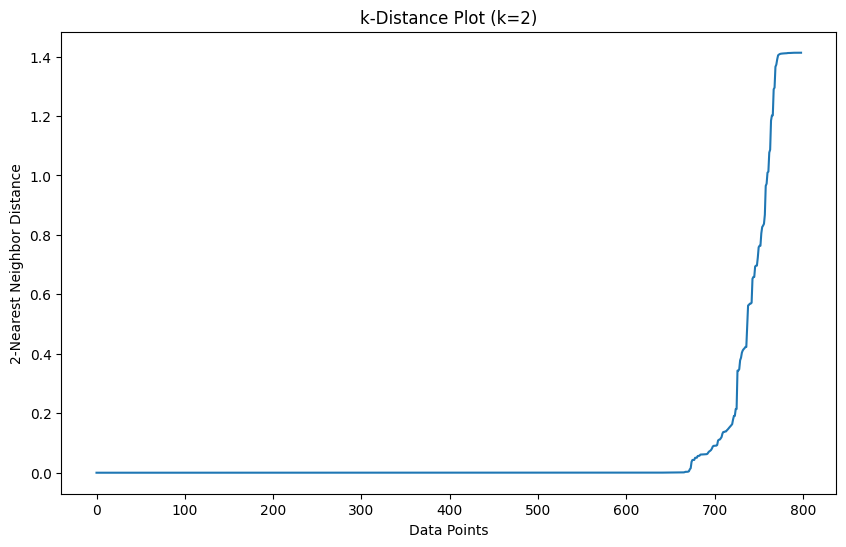

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Number of nearest neighbors to consider
k = 2  # Adjust as needed

# Find the k-nearest neighbors for each data point
nearest_neighbors = NearestNeighbors(n_neighbors=k)
nearest_neighbors.fit(embedding)
distances, indices = nearest_neighbors.kneighbors(embedding)

# Sort distances (4th nearest neighbor distance) for each point
distances = np.sort(distances[:, k-1])

# Plot the k-distance plot
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel(f'Data Points')
plt.ylabel(f'{k}-Nearest Neighbor Distance')
plt.title(f'k-Distance Plot (k={k})')
plt.show()

In [ ]:
eps = 0.25  # Replace with the value found from the plot

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(embedding)

Noise: [1568, 1210, 1005, 1256, 1163, 1048, 1503, 1809, 1990, 1310, 1480, 2073, 1535, 1009, 1199, 1356, 1151, 1096, 1021, 1050, 1857, 2158, 1194, 1306, 1053, 1755, 1452, 1240, 1247, 2111, 1183, 1322, 2075, 1001, 1539, 1672, 1887, 1849, 2189, 1296, 1230, 1686, 1122, 1123, 1258, 1648, 1456, 2127, 2014, 1933, 1357, 1250, 1381, 2050, 1474, 1190, 2023, 1907, 2001, 2036, 1091, 1998, 1750, 1684, 1955, 1506, 1596, 1567, 1343, 1635, 1270, 1225, 1688]
Cluster 0: [1309, 1011, 1259, 1147, 1393, 1039, 1074, 1668, 1007, 1832, 1099, 1488, 1801, 1076, 1944, 1659, 1205, 1220, 1032, 1837, 1061, 1222, 1017, 1075, 1023, 2085, 2088, 1350, 1327, 1276, 1666, 1056, 1748, 1658, 1003, 1228, 1138, 1089, 1002, 1623, 1264, 1875, 1004, 1595, 1090, 1051, 1101, 1079, 1104, 1839, 1747, 1135, 1656, 1148, 1136, 1172, 1132, 1774, 1037, 1930, 2184, 1243, 1293, 1690, 1449, 1679, 1159, 1335, 1862, 1049, 1105, 1766, 1013, 1541, 1961, 1575, 1189, 1723, 1962, 1084, 2146, 1405, 1729, 2166, 1015, 1344, 1917, 1077, 1087, 1431, 10

<ipython-input-170-1e3a6020b5c6>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels) - 1)
<ipython-input-170-1e3a6020b5c6>:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(node_embeddings_tsne[labels == label, 0], node_embeddings_tsne[labels == label, 1], c=colors(label), label=f'Cluster {label}')


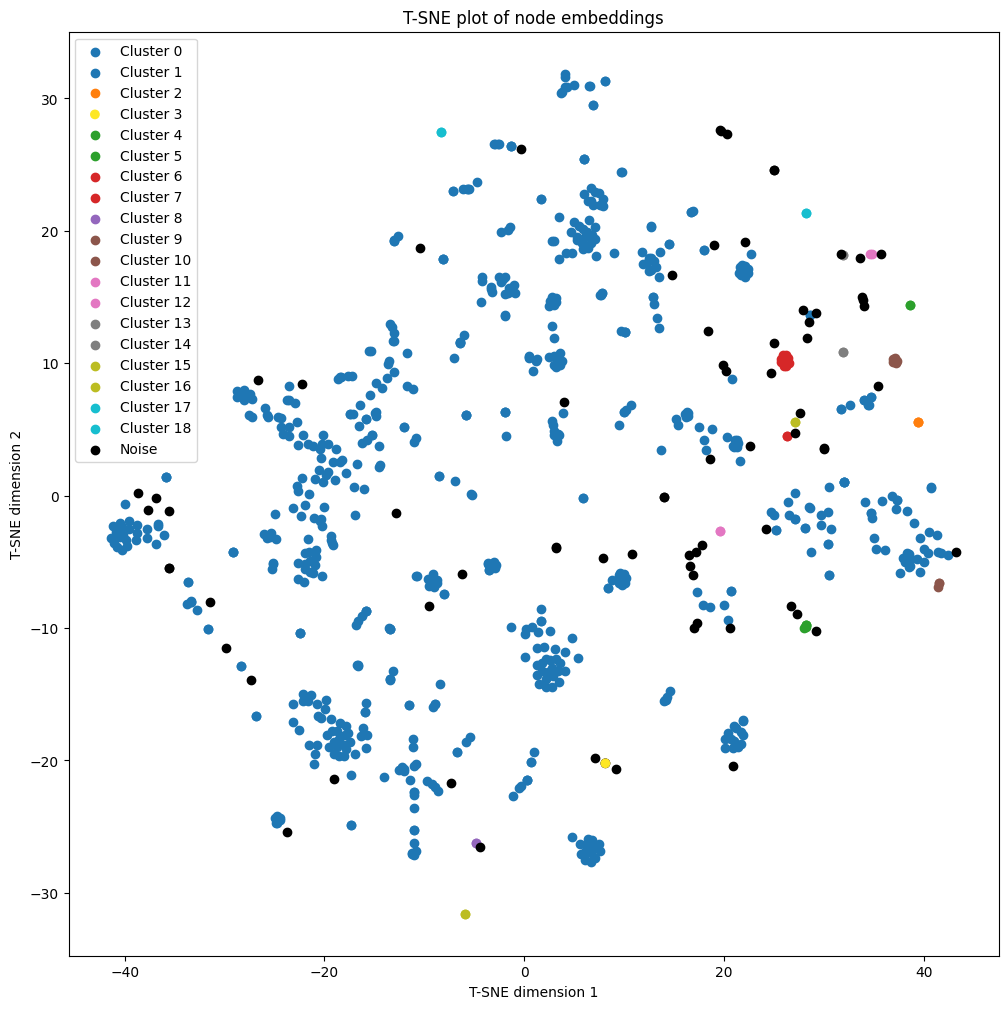

In [ ]:
# Create a dictionary to hold cluster information
clusters = {}
for node, label in zip(G.nodes(), labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(node)

# Print nodes in each cluster
for label in sorted(clusters):
    if label == -1:
        print(f"Noise: {clusters[label]}")
    else:
        print(f"Cluster {label}: {clusters[label]}")

# Visualize the clusters using T-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
node_embeddings_tsne = tsne.fit_transform(embedding)

# Plot the T-SNE plot with clustering labels
plt.figure(figsize=(12, 12))
unique_labels = set(labels)

# Define colors to use for each cluster and for noise points
colors = plt.cm.get_cmap('tab10', len(unique_labels) - 1)

# Plot each cluster
for label in unique_labels:
    if label == -1:
        # Plot noise points with a different color
        plt.scatter(node_embeddings_tsne[labels == label, 0], node_embeddings_tsne[labels == label, 1], c='black', label='Noise')
    else:
        # Plot clusters with different colors
        plt.scatter(node_embeddings_tsne[labels == label, 0], node_embeddings_tsne[labels == label, 1], c=colors(label), label=f'Cluster {label}')

plt.title('T-SNE plot of node embeddings')
plt.xlabel('T-SNE dimension 1')
plt.ylabel('T-SNE dimension 2')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import networkx as nx
from sklearn.manifold import SpectralEmbedding, TSNE
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('Payments.csv')

# Construct the graph from the data
G = nx.from_pandas_edgelist(df, source='Sender', target='Receiver', edge_attr='Amount', create_using=nx.DiGraph())

In [ ]:
# Calculate the graph Laplacian and perform spectral embedding
n_components = 2  # Number of dimensions to embed the data
embedding = SpectralEmbedding(n_components=n_components, affinity='precomputed', random_state=42)

# Convert the adjacency matrix from np.matrix to np.array using np.asarray
adj_matrix = nx.to_numpy_array(G)
node_embeddings_spectral = embedding.fit_transform(adj_matrix)

# Choose a clustering algorithm (e.g., KMeans, DBSCAN)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:248: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

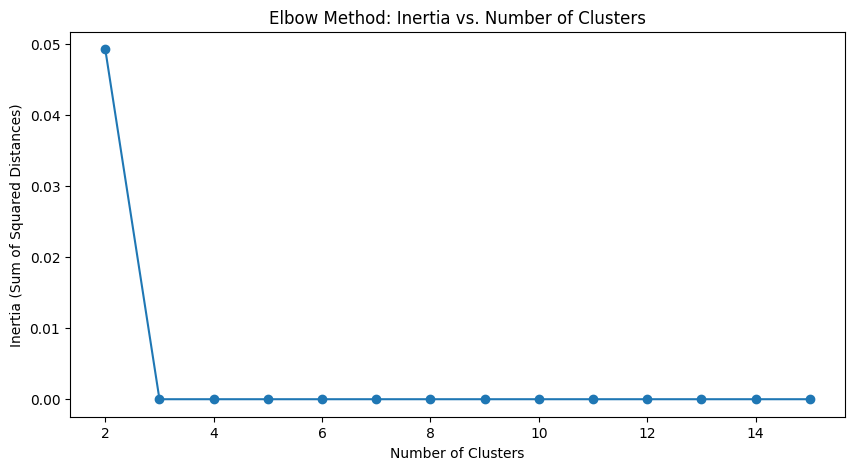

In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



max_clusters = 15  # Adjust as needed
inertia = []
silhouette_scores = []

# Loop through different numbers of clusters
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(node_embeddings_spectral)

    # Calculate the sum of squared distances (inertia)
    inertia.append(kmeans.inertia_)

    # Calculate the silhouette score
    if k > 1:
        silhouette_scores.append(silhouette_score(node_embeddings_spectral, labels))

# Plot the Elbow plot
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method: Inertia vs. Number of Clusters')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-174-583b5071f479>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10')
<ipython-input-174-583b5071f479>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(node_embeddings_tsne[cluster_indices, 0], node_embeddings_tsne[cluster_indices, 1], c=colors(lab

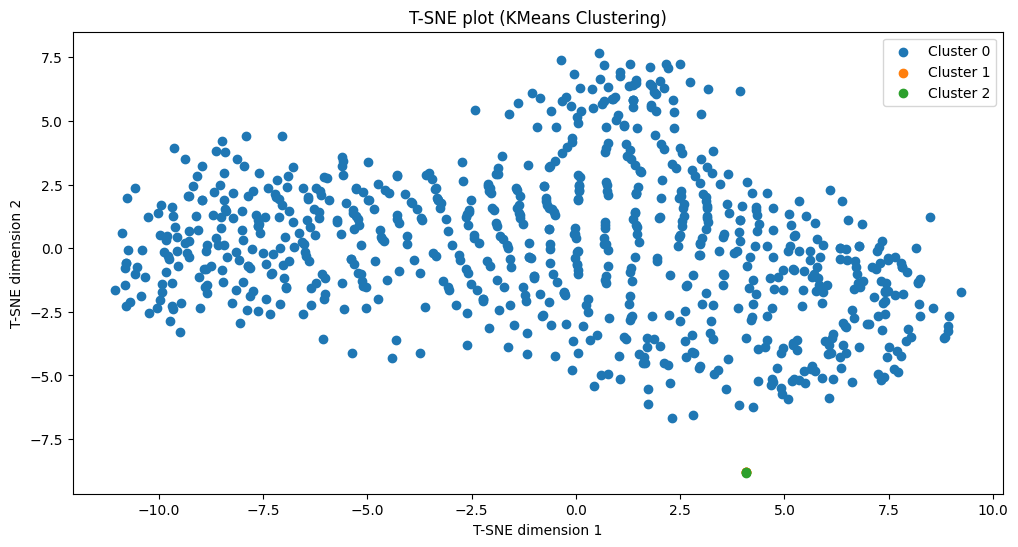


Clusters identified by KMeans clustering:
Cluster 0: [1309, 1011, 1259, 1568, 1147, 1393, 1039, 1210, 1005, 1042, 1256, 1074, 1668, 1163, 1007, 1034, 1832, 1099, 1488, 1801, 1076, 1944, 1659, 1048, 1205, 1057, 1220, 1032, 1837, 1061, 1222, 1017, 1075, 1023, 2085, 1503, 2088, 1350, 1327, 1276, 1666, 1056, 1748, 1658, 1003, 1228, 1138, 1089, 1002, 1623, 1264, 1875, 1004, 1595, 1090, 1051, 1101, 1079, 1104, 1839, 1747, 1135, 1656, 1500, 1148, 1136, 1172, 1132, 1809, 1774, 1037, 1930, 2184, 1243, 1293, 1990, 1690, 1449, 1310, 1679, 1159, 1335, 1862, 1049, 1105, 1766, 1013, 1541, 1961, 1575, 1189, 1723, 1962, 1084, 1480, 2146, 1405, 1016, 1729, 2166, 2073, 1015, 1344, 1917, 1535, 1077, 1087, 1431, 1080, 1098, 1701, 1009, 1191, 1142, 1081, 1146, 1199, 1754, 1545, 1134, 1517, 1202, 1389, 1014, 1356, 1068, 1633, 1108, 1140, 1120, 1528, 1678, 1447, 1035, 1326, 1181, 1246, 1406, 1168, 1046, 1019, 1058, 1040, 1060, 1078, 1581, 1353, 1287, 1128, 1149, 1209, 1813, 1529, 2031, 1236, 1617, 1215, 147

In [ ]:
# KMeans
n_clusters = 3  # Adjust as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(node_embeddings_spectral)

# # Alternatively, use DBSCAN
# eps = 0.5  # Adjust as needed
# min_samples = 5  # Adjust as needed
# dbscan = DBSCAN(eps=eps, min_samples=min_samples)
# dbscan_labels = dbscan.fit_predict(node_embeddings_spectral)

# Visualize the clusters using T-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
node_embeddings_tsne = tsne.fit_transform(node_embeddings_spectral)


# Plotting KMeans clustering
plt.figure(figsize=(12, 6))
unique_kmeans_labels = np.unique(kmeans_labels)
colors = plt.cm.get_cmap('tab10')

# Plot each cluster for KMeans
for label in unique_kmeans_labels:
    cluster_indices = np.where(kmeans_labels == label)[0]
    plt.scatter(node_embeddings_tsne[cluster_indices, 0], node_embeddings_tsne[cluster_indices, 1], c=colors(label), label=f'Cluster {label}')

plt.title('T-SNE plot (KMeans Clustering)')
plt.xlabel('T-SNE dimension 1')
plt.ylabel('T-SNE dimension 2')
plt.legend()
plt.show()

# Print the clusters
print("\nClusters identified by KMeans clustering:")

# Create a dictionary to hold clusters
clusters = {}
for node, label in zip(G.nodes(), kmeans_labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(node)

# Print the clusters
for label in sorted(clusters):
    print(f"Cluster {label}: {clusters[label]}")



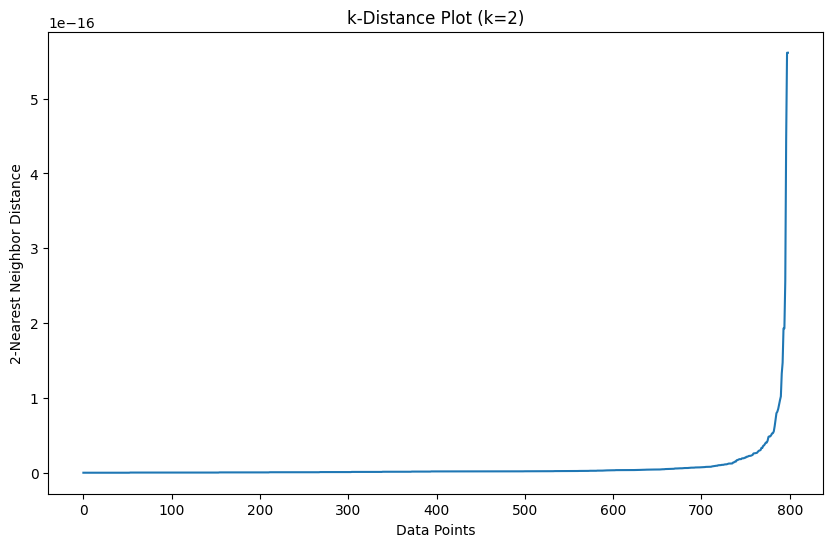

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Number of nearest neighbors to consider
k = 2  # Adjust as needed
# Find the k-nearest neighbors for each data point
nearest_neighbors = NearestNeighbors(n_neighbors=k)
nearest_neighbors.fit(node_embeddings_spectral)
distances, indices = nearest_neighbors.kneighbors(node_embeddings_spectral)

# Sort distances (4th nearest neighbor distance) for each point
distances = np.sort(distances[:, k-1])

# Plot the k-distance plot
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel(f'Data Points')
plt.ylabel(f'{k}-Nearest Neighbor Distance')
plt.title(f'k-Distance Plot (k={k})')
plt.show()

In [ ]:
eps = 0.25  # Adjust as needed
min_samples = 1  # Adjust as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(node_embeddings_spectral)

<ipython-input-177-a200cf2e5be8>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_dbscan_labels))
<ipython-input-177-a200cf2e5be8>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(node_embeddings_tsne[cluster_indices, 0], node_embeddings_tsne[cluster_indices, 1], c=colors(label), label=f'Cluster {label}')


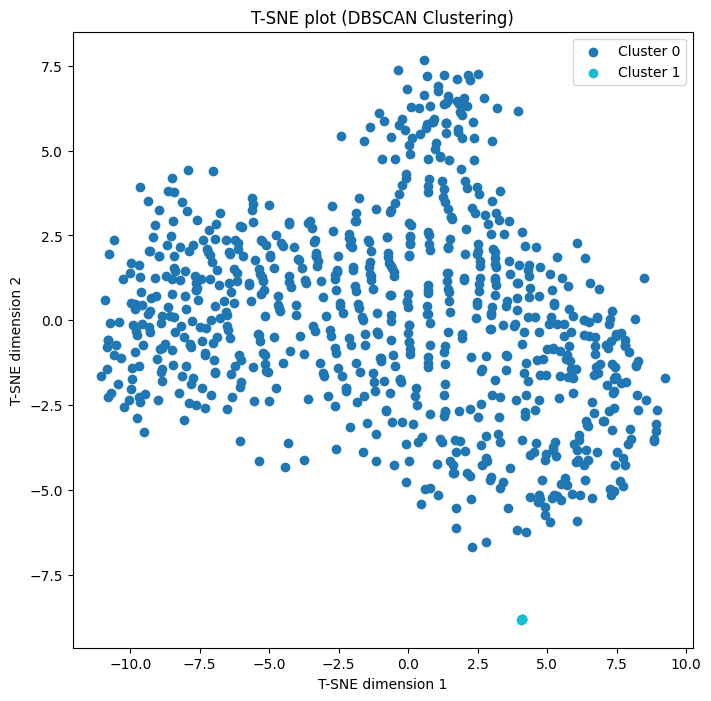


Clusters identified by DBSCAN clustering:
Cluster 0: [1309, 1011, 1259, 1568, 1147, 1393, 1039, 1210, 1005, 1042, 1256, 1074, 1668, 1163, 1007, 1034, 1832, 1099, 1488, 1801, 1076, 1944, 1659, 1048, 1205, 1057, 1220, 1032, 1837, 1061, 1222, 1017, 1075, 1023, 2085, 1503, 2088, 1350, 1327, 1276, 1666, 1056, 1748, 1658, 1003, 1228, 1138, 1089, 1002, 1623, 1264, 1875, 1004, 1595, 1090, 1051, 1101, 1079, 1104, 1839, 1747, 1135, 1656, 1500, 1148, 1136, 1172, 1132, 1809, 1774, 1037, 1930, 2184, 1243, 1293, 1990, 1690, 1449, 1310, 1679, 1159, 1335, 1862, 1049, 1105, 1766, 1013, 1541, 1961, 1575, 1189, 1723, 1962, 1084, 1480, 2146, 1405, 1016, 1729, 2166, 2073, 1015, 1344, 1917, 1535, 1077, 1087, 1431, 1080, 1098, 1701, 1009, 1191, 1142, 1081, 1146, 1199, 1754, 1545, 1134, 1517, 1202, 1389, 1014, 1356, 1068, 1633, 1108, 1140, 1120, 1528, 1678, 1447, 1035, 1326, 1181, 1246, 1406, 1168, 1046, 1019, 1058, 1040, 1060, 1078, 1581, 1353, 1287, 1128, 1149, 1209, 1813, 1529, 2031, 1236, 1617, 1215, 147

In [ ]:


# Visualize the clusters using T-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
node_embeddings_tsne = tsne.fit_transform(node_embeddings_spectral)

# Plotting DBSCAN clustering
plt.figure(figsize=(8, 8))
unique_dbscan_labels = np.unique(dbscan_labels)
colors = plt.cm.get_cmap('tab10', len(unique_dbscan_labels))

# Plot each cluster for DBSCAN
for label in unique_dbscan_labels:
    cluster_indices = np.where(dbscan_labels == label)[0]
    if label == -1:
        # Plot noise points in black
        plt.scatter(node_embeddings_tsne[cluster_indices, 0], node_embeddings_tsne[cluster_indices, 1], c='black', label='Noise')
    else:
        plt.scatter(node_embeddings_tsne[cluster_indices, 0], node_embeddings_tsne[cluster_indices, 1], c=colors(label), label=f'Cluster {label}')

plt.title('T-SNE plot (DBSCAN Clustering)')
plt.xlabel('T-SNE dimension 1')
plt.ylabel('T-SNE dimension 2')
plt.legend()
plt.show()

# Print the clusters
print("\nClusters identified by DBSCAN clustering:")

# Create a dictionary to hold clusters
clusters = {}
for node, label in zip(G.nodes(), dbscan_labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(node)

# Print the clusters
for label in sorted(clusters):
    if label == -1:
        print(f"Noise points: {clusters[label]}")
    else:
        print(f"Cluster {label}: {clusters[label]}")

In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.5 MB/s eta 0:00:00


In [179]:
import torch
import torch.nn.functional as F
from sklearn.cluster import KMeans
from torch_geometric.nn import GCNConv
import networkx as nx

In [181]:
import pandas as pd
import networkx as nx

def construct_directed_graph(csv_file_path):
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Initialize a directed graph
    directed_graph = nx.DiGraph()

    # Add edges to the directed graph
    # Iterate through each row in the DataFrame
    for _, row in df.iterrows():
        sender = row['Sender']
        receiver = row['Receiver']
        amount = row['Amount']

        # Add an edge to the directed graph
        directed_graph.add_edge(sender, receiver, weight=amount)

    return directed_graph

# Specify the path to the CSV file
csv_file_path = 'Payments.csv'

# Construct the directed graph from the CSV file
directed = construct_directed_graph(csv_file_path)

# Now you have a directed graph constructed from the Payments.csv file
# You can use the directed graph for further analysis or visualization


In [182]:
# Create the directed adjacency matrix
adjacency_matrix = nx.adjacency_matrix(directed)

num_nodes = adjacency_matrix.shape[0]

# Initialize features as an identity matrix
features = torch.eye(num_nodes)
adjacency_matrix = torch.FloatTensor(adjacency_matrix.toarray())

<ipython-input-182-822f86b825cc>:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(directed)


In [183]:
# Define GCN model
class GCN(torch.nn.Module):
    def __init__(self, num_features, num_nodes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, 64)
        self.conv2 = GCNConv(64, num_nodes)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x


In [184]:
model = GCN(num_features=num_nodes, num_nodes=num_nodes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
model.train()

GCN(
  (conv1): GCNConv(799, 64)
  (conv2): GCNConv(64, 799)
)

In [185]:
# Train the model
epochs = 250
for epoch in range(1, epochs + 1):
    optimizer.zero_grad()
    # Convert adjacency matrix to edge list using torch.nonzero
    edge_index = torch.nonzero(adjacency_matrix, as_tuple=False).t()
    # Pass features and edge list to the model
    reconstructed_adjacency = model(features, edge_index)
    # Compute loss
    loss = F.mse_loss(reconstructed_adjacency, adjacency_matrix)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 100, Loss: 47280548.0
Epoch 200, Loss: 45430796.0


In [186]:
# Obtain embeddings
model.eval()
with torch.no_grad():
    embeddings = reconstructed_adjacency.detach().numpy()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

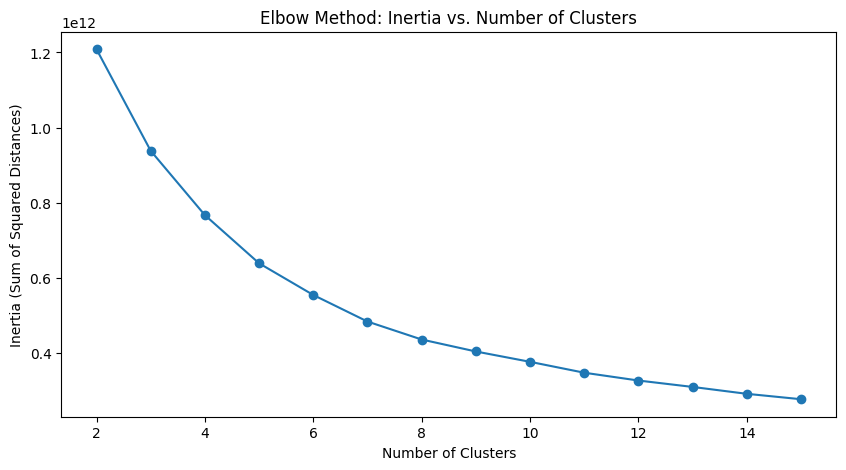

In [188]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



max_clusters = 15  # Adjust as needed
inertia = []

# Loop through different numbers of clusters
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(embeddings)

    # Calculate the sum of squared distances (inertia)
    inertia.append(kmeans.inertia_)

# Plot the Elbow plot
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method: Inertia vs. Number of Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: [1051, 1101, 1774, 1159, 1480, 1015, 1431, 1080, 1009, 1134, 1202, 1140, 1035, 1058, 1114, 1769, 1471, 1419, 1103, 1179, 1624, 1272, 1201, 1289, 1855, 1024, 1008, 1660, 1110, 1646, 1053, 1557, 1211, 1026, 1789, 1133, 1452, 1240, 1028, 1262, 1534, 1786, 1340, 1638, 1651, 1082, 1267, 1200, 1164, 1551, 1232, 1647, 1412, 1708, 1033, 1154, 1093, 1342, 1129, 1094, 1158, 1531, 1085, 1324, 1062, 2162, 2027, 1292, 2014, 1235, 1173, 1192, 1190, 1249, 1212, 1171, 1341, 1178, 1161, 1385, 1364, 1270]
Cluster 1: [1259, 1256, 1668, 1163, 1832, 1488, 1220, 1222, 1056, 1003, 1228, 1138, 1089, 1002, 1004, 1090, 1146, 1068, 1168, 1149, 1224, 2190, 1328, 1956, 1377, 1194, 1083, 1845, 1349, 1180, 1783, 1955]
Cluster 2: [1393, 1045, 1018, 1032, 1658, 1623, 1595, 1839, 1747, 1500, 1148, 1132, 2184, 1293, 1679, 1335, 1766, 1541, 1575, 2073, 1344, 1917, 1535, 1077, 1191, 1545, 1389, 1633, 1528, 1046, 1581, 1353, 1287, 1529, 2031, 1617, 1484, 1835, 1696, 1553, 1582, 2034, 1939, 1597, 1591, 1302, 1339

<ipython-input-189-ba4da829c1f6>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))
<ipython-input-189-ba4da829c1f6>:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(node_embeddings_tsne[cluster_indices, 0], node_embeddings_tsne[cluster_indices, 1], c=colors(label), label=f'Cluster {label}')


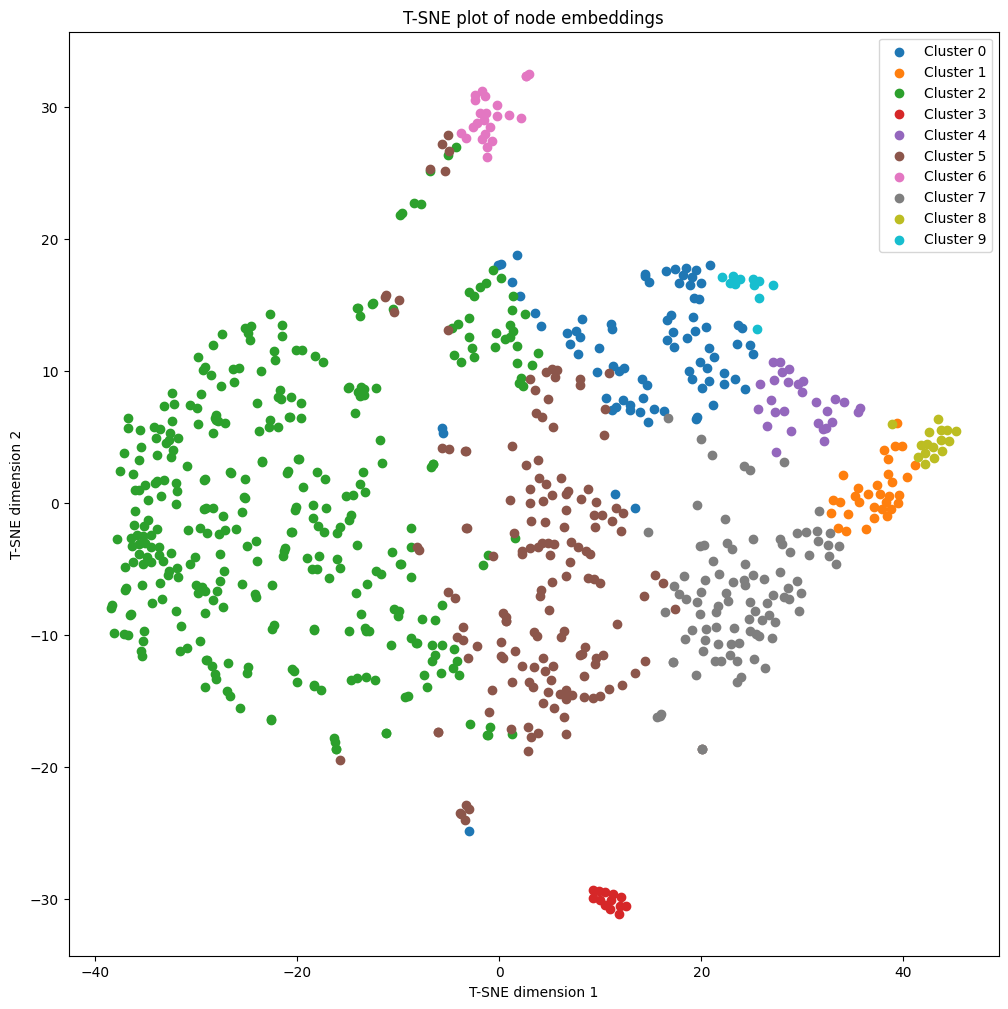

In [189]:


# Apply clustering algorithm (e.g., KMeans or DBSCAN)
# KMeans
n_clusters = 10 # Adjust as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)


clusters = {}
for node, label in zip(G.nodes(), labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(node)

# Print nodes in each cluster
for label in sorted(clusters):
    print(f"Cluster {label}: {clusters[label]}")

# Visualize the clusters using T-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
node_embeddings_tsne = tsne.fit_transform(embeddings)

# Plot the T-SNE plot with clustering labels
plt.figure(figsize=(12, 12))
unique_labels = set(labels)
colors = plt.cm.get_cmap('tab10', len(unique_labels))

# Plot each cluster
for label in unique_labels:
    if label == -1:
        # Noise points (if using DBSCAN)
        continue
    cluster_indices = np.where(labels == label)[0]
    plt.scatter(node_embeddings_tsne[cluster_indices, 0], node_embeddings_tsne[cluster_indices, 1], c=colors(label), label=f'Cluster {label}')

plt.title('T-SNE plot of node embeddings')
plt.xlabel('T-SNE dimension 1')
plt.ylabel('T-SNE dimension 2')
plt.legend()
plt.show()

In [190]:
min_samples = 2

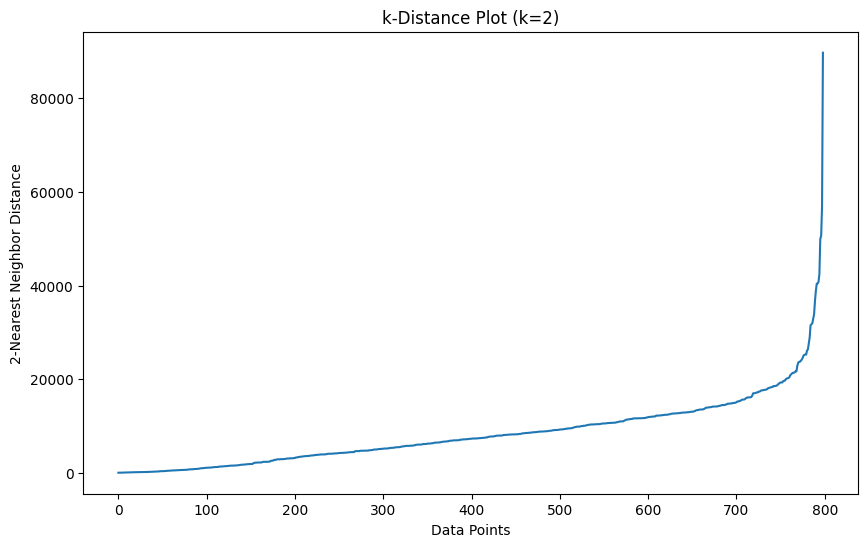

In [192]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Number of nearest neighbors to consider
k = 2  # Adjust as needed

# Find the k-nearest neighbors for each data point
nearest_neighbors = NearestNeighbors(n_neighbors=k)
nearest_neighbors.fit(embeddings)
distances, indices = nearest_neighbors.kneighbors(embeddings)

# Sort distances (4th nearest neighbor distance) for each point
distances = np.sort(distances[:, k-1])

# Plot the k-distance plot
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel(f'Data Points')
plt.ylabel(f'{k}-Nearest Neighbor Distance')
plt.title(f'k-Distance Plot (k={k})')
plt.show()

In [194]:
eps = 20000  # Replace with the value found from the plot

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(embeddings)

Noise: [1309, 1007, 1034, 1076, 1659, 1048, 1205, 1017, 1350, 1056, 1138, 1002, 1004, 1037, 1013, 1084, 1480, 1016, 1080, 1098, 1108, 1019, 1103, 1072, 1612, 1184, 1377, 1306, 1088, 1824, 1112, 1570, 2066, 1038, 1137, 1139, 1887, 1071, 1966, 1703, 1161, 1385]
Cluster 0: [1011, 1147, 1039, 1074, 1099, 1023, 1356, 1328]
Cluster 1: [1259, 1568, 1393, 1045, 1018, 1256, 1668, 1163, 1832, 1801, 1944, 1032, 1837, 1061, 1222, 2085, 1503, 2088, 1666, 1748, 1658, 1003, 1228, 1623, 1264, 1875, 1595, 1090, 1051, 1101, 1104, 1839, 1747, 1135, 1656, 1500, 1148, 1132, 1809, 1774, 1930, 2184, 1293, 1990, 1690, 1449, 1679, 1159, 1335, 1862, 1766, 1541, 1961, 1575, 1189, 1723, 1962, 2146, 1405, 1729, 2166, 2073, 1015, 1344, 1917, 1535, 1077, 1087, 1431, 1701, 1009, 1191, 1142, 1081, 1146, 1754, 1545, 1134, 1517, 1202, 1389, 1014, 1633, 1140, 1120, 1528, 1678, 1447, 1035, 1406, 1168, 1046, 1058, 1040, 1060, 1078, 1581, 1353, 1287, 1128, 1149, 1209, 1813, 1529, 2031, 1236, 1617, 1215, 1470, 1065, 1126, 14

<ipython-input-195-41d266d0bb1b>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels) - 1)
<ipython-input-195-41d266d0bb1b>:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(node_embeddings_tsne[labels == label, 0], node_embeddings_tsne[labels == label, 1], c=colors(label), label=f'Cluster {label}')


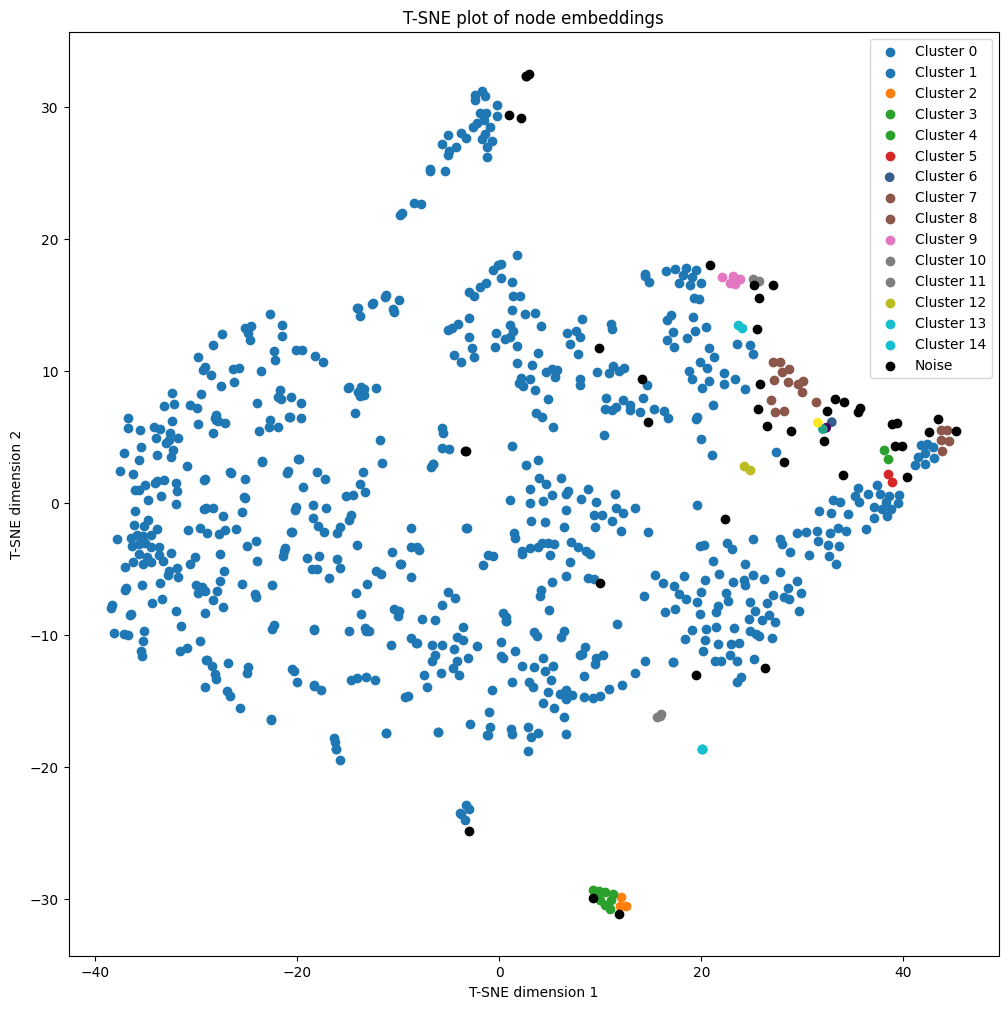

In [195]:
# Create a dictionary to hold cluster information
clusters = {}
for node, label in zip(G.nodes(), labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(node)

# Print nodes in each cluster
for label in sorted(clusters):
    if label == -1:
        print(f"Noise: {clusters[label]}")
    else:
        print(f"Cluster {label}: {clusters[label]}")

# Visualize the clusters using T-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
node_embeddings_tsne = tsne.fit_transform(embeddings)

# Plot the T-SNE plot with clustering labels
plt.figure(figsize=(12, 12))
unique_labels = set(labels)

# Define colors to use for each cluster and for noise points
colors = plt.cm.get_cmap('tab10', len(unique_labels) - 1)

# Plot each cluster
for label in unique_labels:
    if label == -1:
        # Plot noise points with a different color
        plt.scatter(node_embeddings_tsne[labels == label, 0], node_embeddings_tsne[labels == label, 1], c='black', label='Noise')
    else:
        # Plot clusters with different colors
        plt.scatter(node_embeddings_tsne[labels == label, 0], node_embeddings_tsne[labels == label, 1], c=colors(label), label=f'Cluster {label}')

plt.title('T-SNE plot of node embeddings')
plt.xlabel('T-SNE dimension 1')
plt.ylabel('T-SNE dimension 2')
plt.legend()
plt.show()